<a href="https://colab.research.google.com/github/ihagoSantos/recommendation-systems/blob/main/data_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analyses

First of all, we must analyse the moovie dataset from GroupLens to understend all the details about it. The dataset is available on https://grouplens.org/datasets/movielens/1m/

In this sense, you must do:
- Read all files by pandas library
- Analyse the number of users, moovies and data sparsity
- Analyse some users and items distributions

In [1]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# useful command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

plt.rcParams.update({'font.size': 14})

# Reading Files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_ratings = pd.read_csv(
    '/content/drive/My Drive/Pós Graduação PUC Minas/11 - Sistemas de Recomendação/Unidade 1/praticas/dataset/ML-1M/ratings.dat',
    sep='::',
    engine='python', # Necessário para delimitadores com mais de 1 caractere
    names=['userId', 'itemId', 'rating', 'timestamp'],
    on_bad_lines='skip'
)

df_movies = pd.read_csv(
     '/content/drive/My Drive/Pós Graduação PUC Minas/11 - Sistemas de Recomendação/Unidade 1/praticas/dataset/ML-1M/movies.dat',
    sep='::',
    engine='python',
    names=['movieId', 'title', 'genres'],
    on_bad_lines='skip',
    encoding='latin1'  # Alternativa para caracteres não UTF-8
)

df_users = pd.read_csv(
     '/content/drive/My Drive/Pós Graduação PUC Minas/11 - Sistemas de Recomendação/Unidade 1/praticas/dataset/ML-1M/users.dat',
    sep='::',
    engine='python',
    names=['userId', 'gender', 'age', 'occupation', 'zip-code'],
    on_bad_lines='skip',
    encoding='latin1'  # Alternativa para caracteres não UTF-8
)

In [4]:
print("Ratings\n")
df_ratings.head()
print("\nMovies\n")
df_movies.head()
print("\nUsers\n")
df_users.head()

Ratings



,userId,itemId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291



Movies



,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy



Users



,userId,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


# A Brief Overview

In [5]:
nb_users = len(df_ratings['userId'].unique())
nb_items = len(df_movies['movieId'].unique())
nb_ratings = len(df_ratings['rating'])

## Conceito de Esparsidade
A **esparsidade** é um conceito utilizado em várias áreas do conhecimento, como matemática, ciência de dados, aprendizado de máquina e computação, para descrever a distribuição de elementos não nulos (ou relevantes) em uma estrutura de dados.

Em termos simples, um conjunto ou matriz é considerado **esparso** quando contém muitos zeros ou elementos irrelevantes em relação ao seu tamanho total. O oposto da esparsidade é a **densidade**, onde há poucos elementos nulos ou irrelevantes.

### Exemplos de Esparsidade

1. **Matrizes Esparsas**:
   - Imagine uma matriz 100x100 onde apenas 5% dos elementos têm valores diferentes de zero. Essa matriz é esparsa porque a maioria dos elementos são zeros.
   - Exemplo:
     ```
     [0, 0, 0, 5]
     [0, 0, 0, 0]
     [0, 7, 0, 0]
     [0, 0, 0, 0]
     ```
     Neste caso, a maior parte dos valores é zero.

2. **Esparsidade em Machine Learning**:
   - Em um modelo de recomendação (como sistemas de recomendação de filmes), uma matriz pode ser usada para representar usuários e suas interações com itens (como filmes). Se a maioria dos usuários não avalia ou interage com a maioria dos filmes, a matriz de interações será esparsa.

3. **Esparsidade em Redes Neurais**:
   - Redes neurais podem ter saídas ou pesos esparsos, onde muitos valores são zero ou insignificantes. Isso é útil para simplificar modelos e melhorar a eficiência.

4. **Esparsidade em Dados Textuais**:
   - Quando representamos textos usando vetores de palavras (como em bag-of-words ou TF-IDF), a maioria das palavras em um vocabulário grande não aparece em um documento específico, tornando os vetores esparsos.

### Por que a Esparsidade é Importante?

1. **Eficiência Computacional**:
   - Estruturas esparsas permitem algoritmos otimizados que armazenam e processam apenas os elementos não nulos, reduzindo o uso de memória e o tempo de processamento.

2. **Melhor Regularização**:
   - Em aprendizado de máquina, esparsidade pode ser induzida como uma forma de regularização (por exemplo, Lasso Regression) para evitar overfitting e simplificar os modelos.

3. **Compressão e Armazenamento**:
   - Estruturas esparsas podem ser compactadas para economizar espaço de armazenamento.

4. **Interpretação**:
   - Em alguns casos, esparsidade facilita a interpretação dos resultados, pois modelos com menos elementos relevantes são mais simples de entender.

### Técnicas Relacionadas
- **Formatos de Armazenamento Esparso**: Compressed Sparse Row (CSR) e Compressed Sparse Column (CSC) são métodos para armazenar matrizes esparsas de forma eficiente.
- **Regularização L1**: Promove a esparsidade ao penalizar coeficientes grandes em modelos de aprendizado de máquina.
- **Sparsificação**: Processo de tornar um modelo ou dados mais esparsos para simplificar ou otimizar o desempenho.

Se precisar de exemplos práticos em código ou aplicação, posso ajudar!

In [6]:
possible_positions = (nb_ratings / float(nb_users * nb_items)) # Razão que indica quantas posições estão preenchidas de todas as possíveis. Ou seja, quantos valores não são nulos
sparsity = 1 - possible_positions # um dado ou matriz é esparso quando contém relativamente poucos valores não nulos em comparação ao seu tamanho total.

In [7]:
print("Basic Overview:")
print(f"- Number of Users: {nb_users}")
print(f"- Number of Movies: {nb_items}")
print(f"- Number of Ratings: {nb_ratings}")
print(f"- Data Sparsity: {sparsity}")

Basic Overview:
- Number of Users: 6040
- Number of Movies: 3883
- Number of Ratings: 1000209
- Data Sparsity: 0.9573532020200125


# Users comsumption historic

In [8]:
# list of items comsumed by each userId
items_comsumed_by_user = df_ratings.groupby('userId')['itemId'].apply(list)
items_comsumed_by_user.head()

,itemId
userId,
1,"[1193, 661, 914, 3408, 2355, 1197, 1287, 2804,..."
2,"[1357, 3068, 1537, 647, 2194, 648, 2268, 2628,..."
3,"[3421, 1641, 648, 1394, 3534, 104, 2735, 1210,..."
4,"[3468, 1210, 2951, 1214, 1036, 260, 2028, 480,..."
5,"[2987, 2333, 1175, 39, 288, 2337, 1535, 1392, ..."


In [9]:
# Users consumption information
users_historic = {}

for userId in df_ratings['userId'].unique():
  users_historic[userId] = len(items_comsumed_by_user[userId])

A **distribuição Power Law** (ou Lei de Potência) é uma distribuição estatística em que a frequência de um evento decai de forma proporcional a uma potência de alguma variável. Essa distribuição é comumente expressa pela fórmula:

\[
P(x) \propto x^{-\alpha}
\]

onde:
- \(P(x)\) é a probabilidade ou frequência de ocorrência de \(x\),
- \(x\) é o valor da variável (geralmente positiva),
- \(\alpha\) é o expoente da lei de potência, um número positivo que controla a rapidez com que a frequência diminui.

### Características da Distribuição Power Law
1. **Decaimento Lento**:
   - Eventos de alta magnitude (ou valores de \(x\)) podem ter uma probabilidade relativamente alta, o que a diferencia de distribuições como a normal, que têm um decaimento exponencial.
2. **Sem uma Escala Definida**:
   - Não há uma escala característica; eventos de todos os tamanhos podem ocorrer, embora eventos menores sejam mais frequentes.
3. **Comportamento Long Tail**:
   - Há uma "cauda longa", onde eventos raros, mas de grande magnitude, continuam a ter uma probabilidade significativa.

### Exemplos de Distribuições Power Law no Mundo Real
1. **Redes e Conectividade**:
   - O número de conexões por nó em uma rede social (como Facebook ou Twitter) frequentemente segue uma distribuição power law. Alguns poucos nós (usuários) têm muitas conexões, enquanto a maioria tem poucas.
   
2. **Riqueza e Renda**:
   - A distribuição de riqueza entre pessoas: uma pequena fração da população controla a maior parte da riqueza (os "super-ricos").

3. **Fenômenos Naturais**:
   - O tamanho de terremotos, incêndios florestais ou erupções vulcânicas segue distribuições power law. Pequenos eventos são muito mais comuns que grandes eventos.

4. **Linguagem**:
   - A frequência de palavras em textos (Lei de Zipf): poucas palavras são usadas muito frequentemente, enquanto a maioria aparece raramente.

5. **Ecosistemas e Populações**:
   - O tamanho de espécies ou populações em um ecossistema pode seguir uma lei de potência.

### Aplicações e Importância
1. **Modelagem de Fenômenos Naturais e Sociais**:
   - É útil para modelar sistemas complexos onde poucos eventos ou elementos têm impacto desproporcional.
   
2. **Redes Complexas**:
   - Power laws aparecem em redes como a Internet, redes biológicas e redes sociais, ajudando na análise de robustez e vulnerabilidade.

3. **Ciência de Dados e Machine Learning**:
   - Na análise de big data, entender distribuições power law pode ajudar a priorizar a análise de dados mais relevantes ou identificar padrões anômalos.

4. **Economia e Negócios**:
   - Em mercados financeiros, a distribuição de retornos extremos frequentemente segue uma lei de potência, ajudando na análise de risco.

### Visualização da Distribuição Power Law
Uma forma comum de visualizar distribuições power law é em um gráfico de log-log, onde a relação entre \(x\) e \(P(x)\) aparece como uma linha reta com inclinação \(-\alpha\). Isso ajuda a verificar a validade de uma lei de potência em dados empíricos.

### Limitações e Cuidados
- **Validação**:
  - Muitas vezes, distribuições observadas que parecem seguir uma power law podem ser melhor descritas por outras distribuições, como log-normal.
- **Dependência do Expoente \(\alpha\)**:
  - O valor de \(\alpha\) pode variar dependendo do fenômeno, e estimá-lo corretamente é crucial para modelagem.
- **Extremos**:
  - Eventos raros, mas de grande impacto, podem dominar sistemas seguindo power law, dificultando previsões.

Se quiser, posso fornecer um exemplo em Python para gerar e visualizar distribuições power law!

Text(0, 0.5, 'Amount of Movies Watched')

Text(0.5, 0, 'Users')

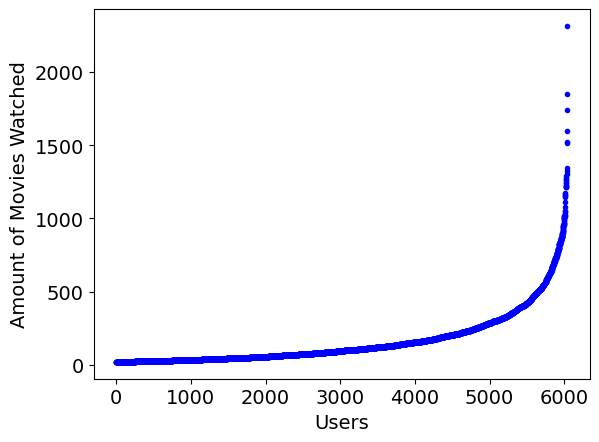

In [12]:
# Plot distribution
# The Data follow a Power Law Distribution
distribution = list(users_historic.values())
distribution.sort()
plt.plot(distribution, '.', color='blue')
plt.ylabel('Amount of Movies Watched')
plt.xlabel('Users')
plt.show()


In [11]:
# Other Informations
users_historic_values = list(users_historic.values())
print("Specific Information")
print(f"- Mean: {np.mean(users_historic_values)}")
print(f"- Median: {np.median(users_historic_values)}")
print(f"- Min: {np.min(users_historic_values)}")
print(f"- Max: {np.max(users_historic_values)}")
print(f"- std: {np.std(users_historic_values)}")

Specific Information
- Mean: 165.5975165562914
- Median: 96.0
- Min: 20
- Max: 2314
- std: 192.73107252940773


# Items Popularity

Indica quantos usuários distintos assistiram a um determinado filme.


In [13]:
# List of users who watched each itemId
users_who_watched = df_ratings.groupby('itemId')['userId'].apply(list)
users_who_watched.head()

,userId
itemId,
1,"[1, 6, 8, 9, 10, 18, 19, 21, 23, 26, 28, 34, 3..."
2,"[10, 13, 18, 23, 27, 40, 44, 48, 53, 60, 62, 7..."
3,"[26, 45, 62, 137, 153, 163, 166, 169, 199, 202..."
4,"[8, 26, 155, 187, 199, 203, 216, 225, 323, 329..."
5,"[26, 48, 155, 169, 202, 237, 261, 264, 284, 30..."


In [17]:
# Users Comsuption information
items_popularity = {}

for itemId in df_ratings['itemId'].unique():
  items_popularity[itemId] = len(users_who_watched[itemId])


Text(0, 0.5, 'Popularity')

Text(0.5, 0, 'Items')

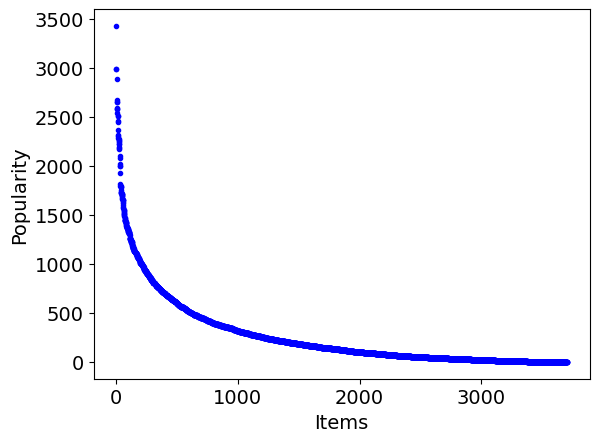

In [23]:
# Plot the distribution

distribution = list(items_popularity.values())
distribution.sort()
plt.plot(distribution[::-1], '.', color='blue')
plt.ylabel('Popularity')
plt.xlabel('Items')
plt.show()

# É possível observar que a informação possui um viés, devido muitos filmes serem pouco assistidos e consequentemente, possuir pouca informação sobre eles na base de dados.
# Um filme que possui muitas avaliações tem um nível de confiança maior do que um filme com poucas avaliações

In [22]:
# Other Informations
items_popularity_values = list(items_popularity.values())
print("Specific Information")
print(f"- Mean: {np.mean(items_popularity_values)}")
print(f"- Median: {np.median(items_popularity_values)}")
print(f"- Min: {np.min(items_popularity_values)}")
print(f"- Max: {np.max(items_popularity_values)}")
print(f"- std: {np.std(items_popularity_values)}")

Specific Information
- Mean: 269.88909875876953
- Median: 123.5
- Min: 1
- Max: 3428
- std: 383.9960197430679
